Importing necessary libraries and loading the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/content/drive/MyDrive/train_LZdllcl.csv')
test = pd.read_csv('/content/drive/MyDrive/test_2umaH9m.csv')

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


Analyzing the size of the datasets.

In [5]:
print('Training dataset size :',train.shape)
print('Testing dataset size :',test.shape)

Training dataset size : (54808, 14)
Testing dataset size : (23490, 13)


Checking for missing values.

In [6]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
train.isna().sum()/len(train)*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [8]:
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [9]:
test.isna().sum()/len(test)*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.401873
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.713921
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


Analyzing the target column - 'is_promoted'. Data imbalance can be observed from the countplot below

<Axes: xlabel='is_promoted', ylabel='count'>

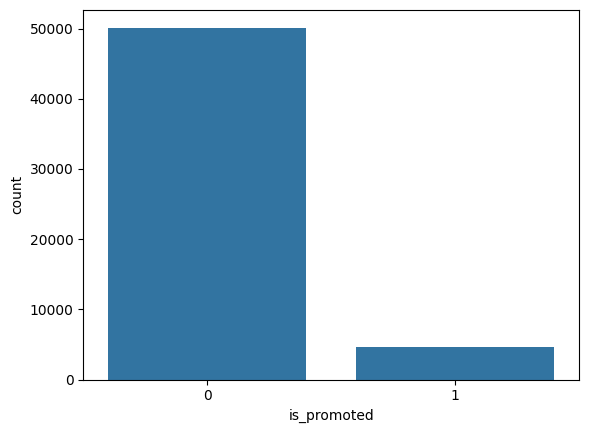

In [12]:
sns.countplot(data=train,x='is_promoted')

Analyzing 'employee_id' column

In [13]:
train['employee_id'].nunique()

54808

Analyzing 'depatment' column

In [14]:
train['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [15]:
train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

<Axes: xlabel='department', ylabel='count'>

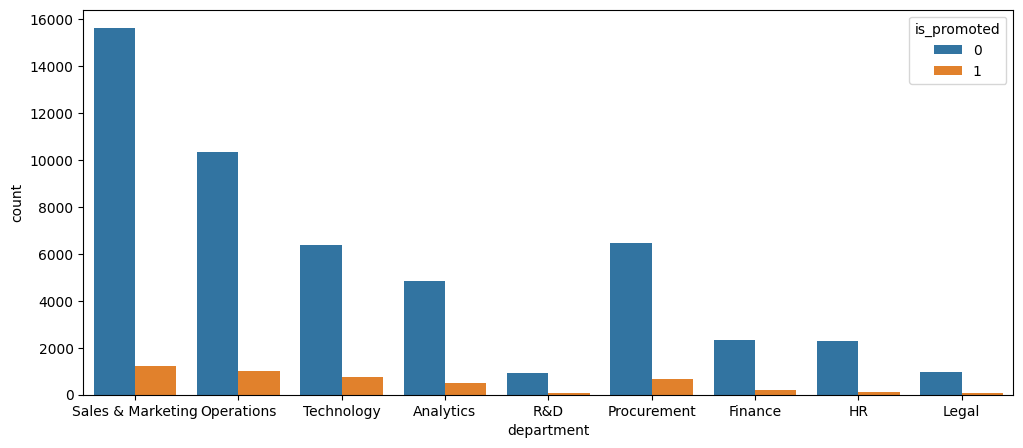

In [16]:
plt.figure(figsize=(12,5))
sns.countplot(data=train,x='department',hue='is_promoted')

The 'department' column has an uneven distribution of values, with some departments having significantly more employees than others.

Analyzing 'region'

In [17]:
train['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

<Axes: xlabel='region', ylabel='count'>

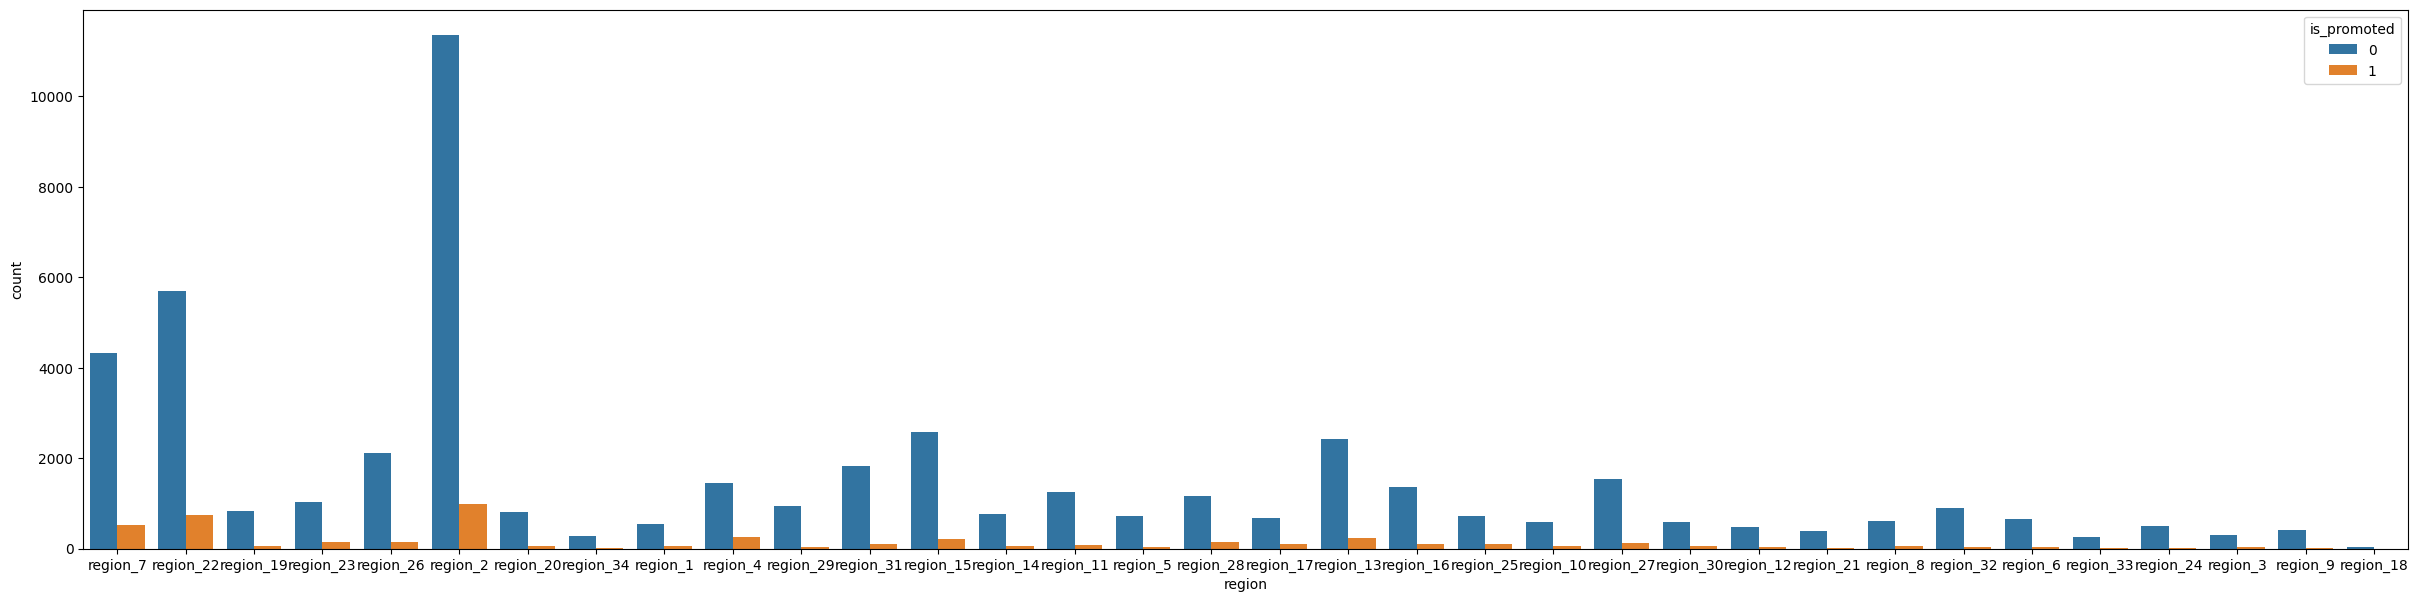

In [18]:
plt.figure(figsize=(30,7))
sns.countplot(data=train,x='region',hue='is_promoted')

The distribution of employees across different regions is imbalanced. Some regions have significantly more employees than others.

Analyzing 'education'

In [19]:
train['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [20]:
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

<Axes: xlabel='education', ylabel='count'>

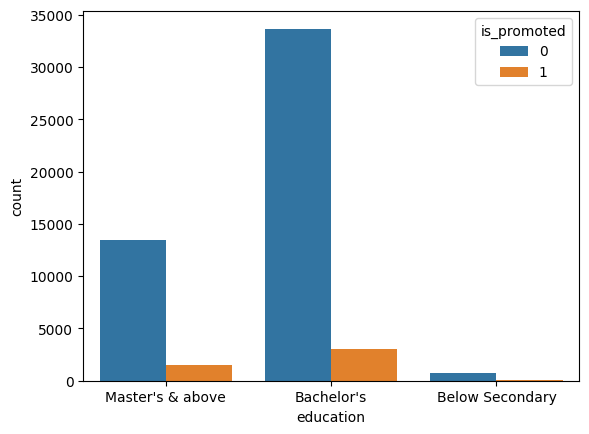

In [21]:
sns.countplot(data=train,x='education',hue='is_promoted')


- The majority of employees in the dataset have a Bachelor's degree.
- Employees with a Below Secondary degree have a lower promotion rate compared to those with higher education levels.

Analyzing 'gender' column

In [22]:
train['gender'].unique()

array(['f', 'm'], dtype=object)

In [23]:
train['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

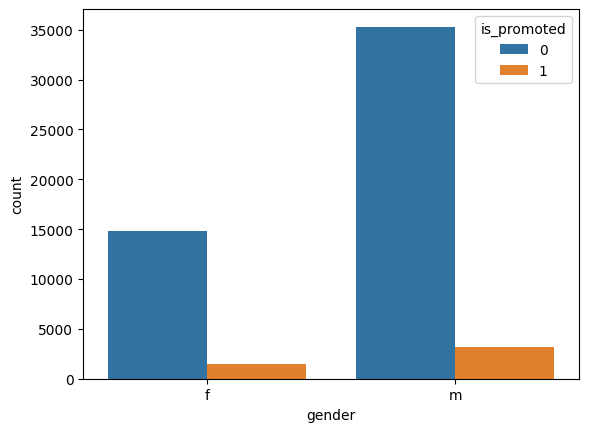

In [24]:
sns.countplot(data=train,x='gender',hue='is_promoted')

Analyzing 'recruitment_channel' column

In [25]:
train['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [26]:
train['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

<Axes: xlabel='recruitment_channel', ylabel='count'>

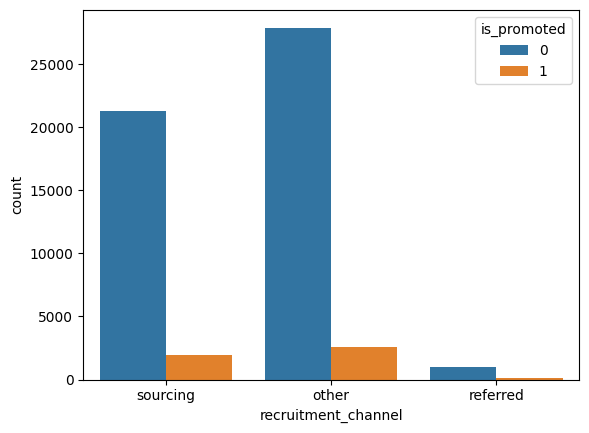

In [27]:
sns.countplot(data=train,x='recruitment_channel',hue='is_promoted')



*   The most common recruitment channels are "other" and "sourcing".
*   The distribution of employees across different recruitment channels is imbalanced. Some channels have significantly more employees than others.



Analyzing 'no_of_trainings' column

In [28]:
train['no_of_trainings'].unique()

array([ 1,  2,  3,  4,  7,  5,  6,  8, 10,  9])

In [29]:
train['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: no_of_trainings, dtype: int64

<Axes: xlabel='no_of_trainings', ylabel='count'>

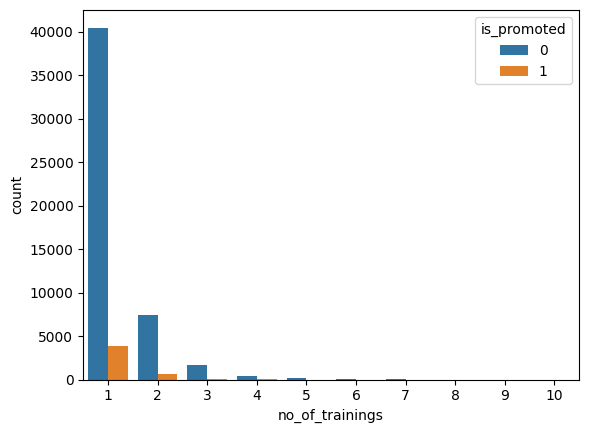

In [30]:
sns.countplot(data=train,x='no_of_trainings',hue='is_promoted')



*   The distribution of the number of trainings attended by employees is skewed, with a majority of employees having attended only one or two trainings.




Analyzing 'age'

In [31]:
train['age'].unique()

array([35, 30, 34, 39, 45, 31, 33, 28, 32, 49, 37, 38, 41, 27, 29, 26, 24,
       57, 40, 42, 23, 59, 44, 50, 56, 20, 25, 47, 36, 46, 60, 43, 22, 54,
       58, 48, 53, 55, 51, 52, 21])

<Axes: xlabel='age', ylabel='count'>

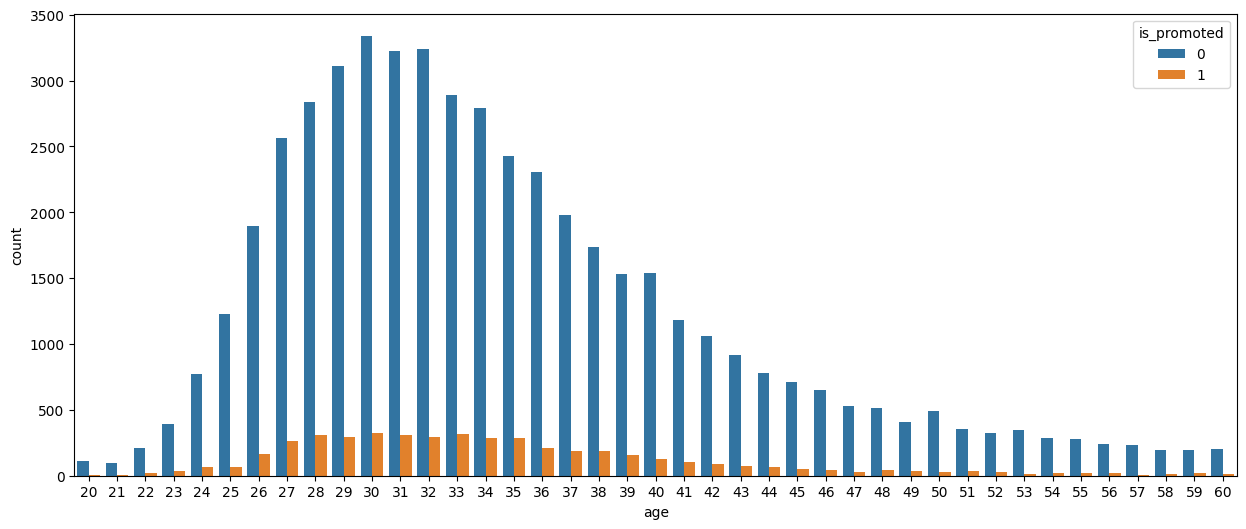

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(data=train,x='age',hue='is_promoted')



*   Employees in the age group of 25-40 have the highest promotion rate, while those in the age group of 55-60 have the lowest promotion rate.




Analyzing previous year rating column

In [33]:
train['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [34]:
train['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

<Axes: xlabel='previous_year_rating', ylabel='count'>

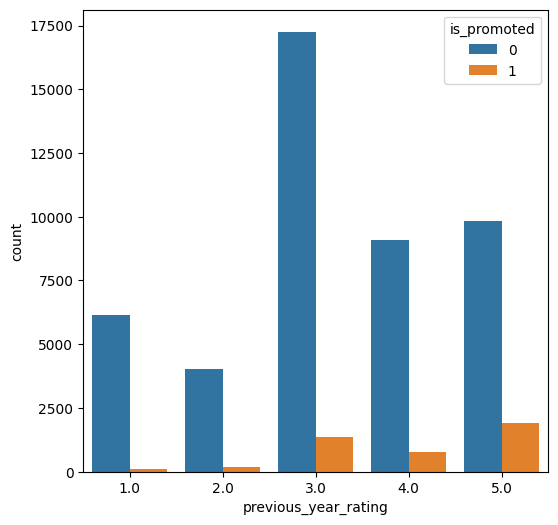

In [35]:
plt.figure(figsize=(6,6))
sns.countplot(data=train,x='previous_year_rating',hue='is_promoted')

- Employees with a previous year rating of 5 have the highest promotion rate.
- Employees with a previous year rating of 2 and below have the lowest promotion rate.

Analyzing 'length_of_service' attribute

In [36]:
train['length_of_service'].unique()

array([ 8,  4,  7, 10,  2,  5,  6,  1,  3, 16,  9, 11, 26, 12, 17, 14, 13,
       19, 15, 23, 18, 20, 22, 25, 28, 24, 31, 21, 29, 30, 34, 27, 33, 32,
       37])

<Axes: xlabel='length_of_service', ylabel='count'>

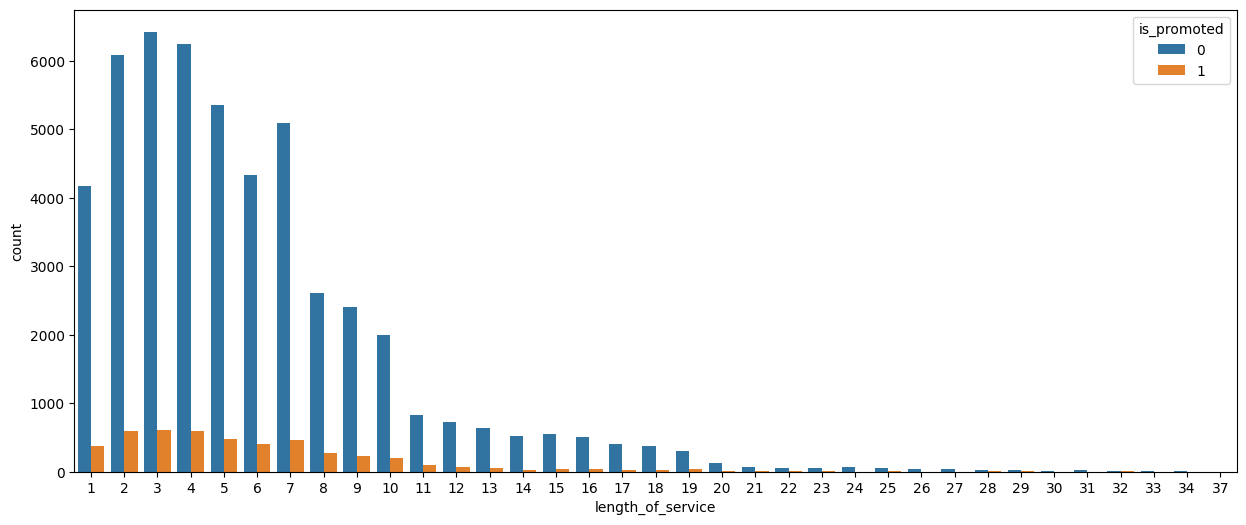

In [37]:
plt.figure(figsize=(15,6))
sns.countplot(data=train,x='length_of_service',hue='is_promoted')

- Employees with a length of service between 2 and 5 years have the highest promotion rate.
- Employees with a length of service of more than 10 years have the lowest promotion rate.

'KPI_met>80%' attribute -

In [38]:
train['KPIs_met >80%'].unique()

array([1, 0])

<Axes: xlabel='KPIs_met >80%', ylabel='count'>

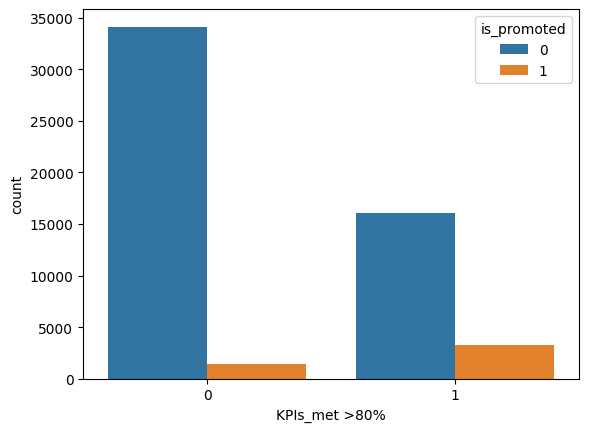

In [39]:
sns.countplot(data=train,x='KPIs_met >80%',hue='is_promoted')



1.   The 'KPI_met >80%' attribute has a significant impact on promotion rates.
2.   Employees who met their KPIs by more than 80% are more likely to be promoted.




In [40]:
train['awards_won?'].unique()

array([0, 1])

<Axes: xlabel='awards_won?', ylabel='count'>

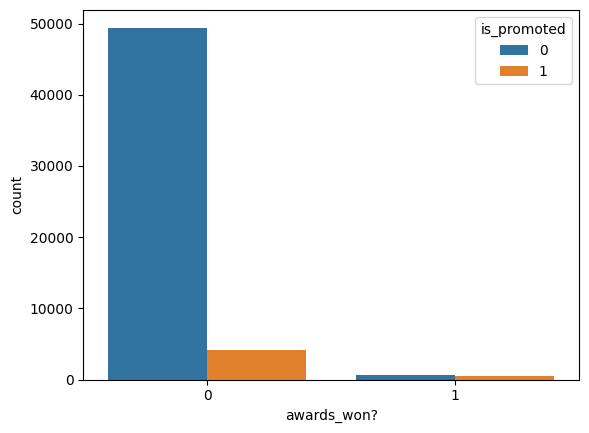

In [41]:
sns.countplot(data=train,x='awards_won?',hue='is_promoted')

Employees who have won awards are more likely to be promoted.

In [42]:
train['avg_training_score'].unique()

array([49, 60, 50, 73, 85, 59, 63, 83, 54, 77, 80, 84, 51, 46, 75, 57, 70,
       68, 79, 44, 72, 61, 48, 58, 87, 47, 52, 88, 71, 65, 62, 53, 78, 91,
       82, 69, 55, 74, 86, 90, 92, 67, 89, 56, 76, 81, 45, 64, 39, 94, 93,
       66, 95, 42, 96, 40, 99, 43, 97, 41, 98])

<Axes: xlabel='avg_training_score', ylabel='count'>

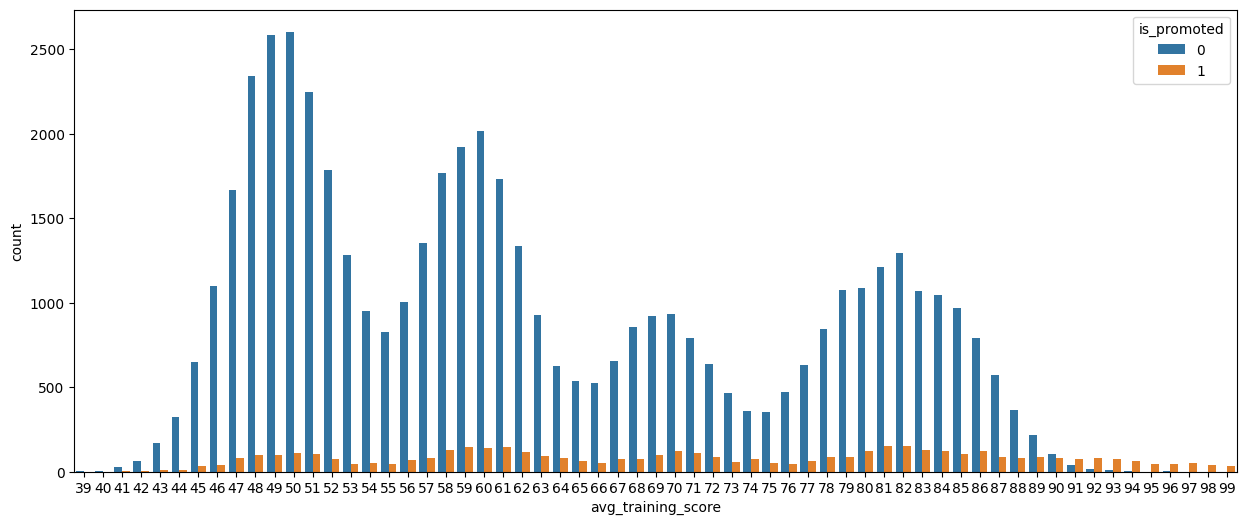

In [43]:
plt.figure(figsize=(15,6))
sns.countplot(data=train,x='avg_training_score',hue='is_promoted')

<Axes: xlabel='avg_training_score', ylabel='Count'>

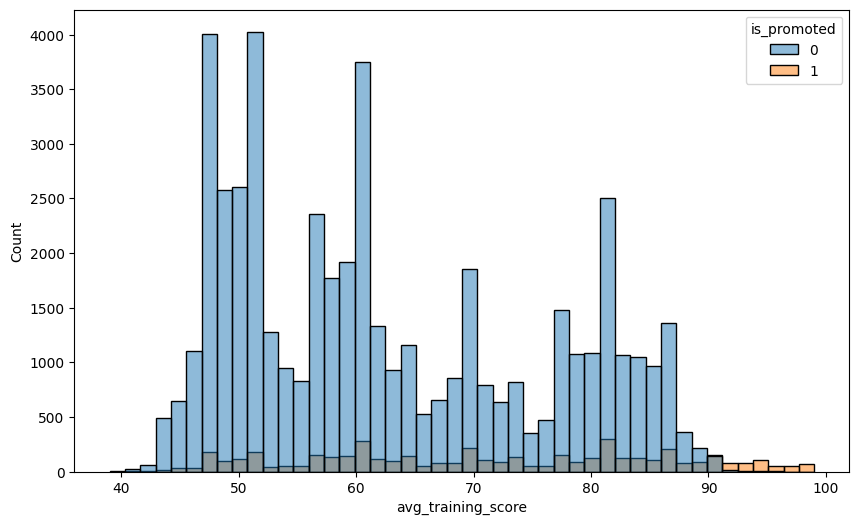

In [44]:
plt.figure(figsize=(10,6))
sns.histplot(data=train,x='avg_training_score',hue='is_promoted')

Employees with average training scores above 75 have a higher promotion rate compared to those with lower scores.

Filling in the missing values in train and test dataset

In [45]:
train['education']=train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating']=train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])
test['education']=test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating']=test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

Checking for Outliers

<Axes: ylabel='age'>

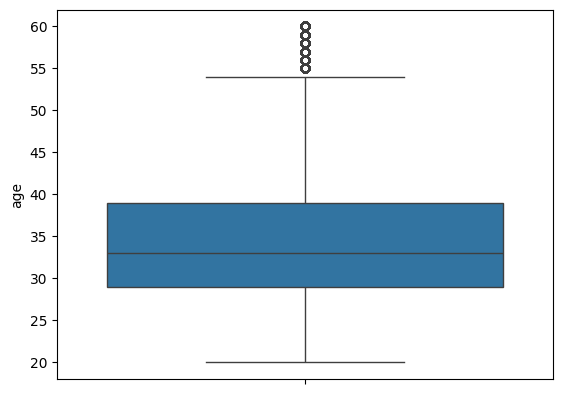

In [46]:
sns.boxplot(train['age'])

<Axes: ylabel='age'>

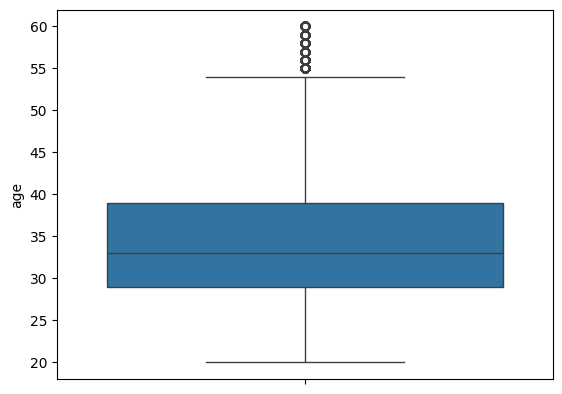

In [47]:
sns.boxplot(test['age'])

<Axes: ylabel='length_of_service'>

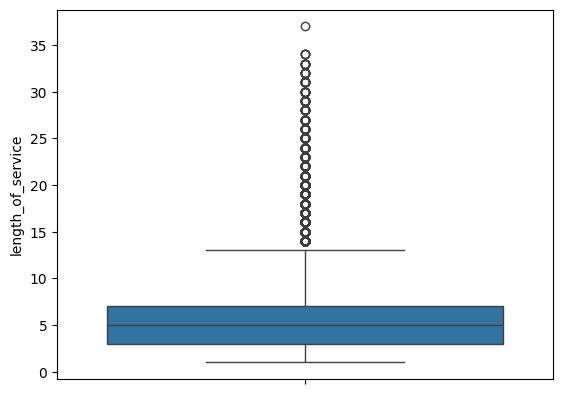

In [48]:
sns.boxplot(train['length_of_service'])

<Axes: ylabel='avg_training_score'>

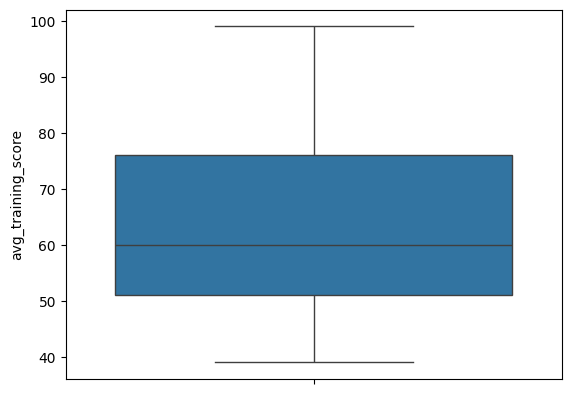

In [49]:
sns.boxplot(train['avg_training_score'])

Removing Outliers

In [50]:
def apply_limit_imputer(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1

    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)

    def limit_imputer(value):
        if value > upper_limit:
            return upper_limit
        elif value < lower_limit:
            return lower_limit
        else:
            return value


    df[column_name] = df[column_name].apply(limit_imputer)

In [51]:
apply_limit_imputer(train, 'age')
apply_limit_imputer(train, 'length_of_service')
apply_limit_imputer(test, 'age')
apply_limit_imputer(test, 'length_of_service')

Encoding Categorical Data

In [52]:
cols = ['department', 'region', 'education', 'gender','recruitment_channel']

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in cols:
  train[i]=le.fit_transform(train[i])


In [54]:
for i in cols:
  test[i] = le.fit_transform(test[i])

In [55]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35.0,5.0,8.0,1,0,49,0
1,65141,4,14,0,1,0,1,30.0,5.0,4.0,0,0,60,0
2,7513,7,10,0,1,2,1,34.0,3.0,7.0,0,0,50,0
3,2542,7,15,0,1,0,2,39.0,1.0,10.0,0,0,50,0
4,48945,8,18,0,1,0,1,45.0,3.0,2.0,0,0,73,0


In [56]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,0,1,2,1,24.0,3.0,1.0,1,0,77
1,74430,2,28,0,0,0,1,31.0,3.0,5.0,0,0,51
2,72255,7,4,0,1,0,1,31.0,1.0,4.0,0,0,47
3,38562,5,11,0,0,0,3,31.0,2.0,9.0,0,0,65
4,64486,1,21,0,1,2,1,30.0,4.0,7.0,0,0,61


Target column and Independent attributes

In [57]:
x=train.drop(['employee_id','is_promoted'],axis=1)
y=train['is_promoted']

Train-test split

In [58]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

Training the Model

In [59]:
from xgboost import XGBClassifier
model_1=XGBClassifier(max_depth=5,learning_rate=0.3)
model_1.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Prediction

In [60]:
y_pred_1=model_1.predict(x_test)

F1-Score and Accuracy

In [61]:
from sklearn.metrics import f1_score,accuracy_score
f1_score(y_test,y_pred_1)

0.513738019169329

In [62]:
accuracy_score(y_test,y_pred_1)

0.9444606626769815

In [63]:
x_sub = test.drop('employee_id',axis=1)

In [64]:
submission_preds=model_1.predict(x_sub)

In [65]:
test_ids=test['employee_id']

In [66]:
df=pd.DataFrame({'employee_id':test_ids.values,
                'is_promoted':submission_preds})

In [67]:
df.to_csv("Submission.csv",index=False)